## Dependencies and starter code

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata="data/Mouse_metadata.csv"
study_results ="data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)




In [21]:
# Combine the data into a single dataset

combined_mousestudy_data=pd.merge(study_results,mouse_metadata, on="Mouse ID" ,how="left")
                                  
                                  
combined_mousestudy_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [22]:

mouse_metadata="data/Mouse_metadata.csv"
study_results ="data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata)
study_results_df = pd.read_csv(study_results)

combined_mousestudy_data_df = pd.merge(study_results_df,mouse_metadata_df, on="Mouse ID" ,how="left")
combined_mousestudy_data_df.head(10)

























,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [23]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


mean = combined_mousestudy_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_mousestudy_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_mousestudy_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = combined_mousestudy_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_mousestudy_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
combined_mousestudy_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": variance, "Tumor Volume Std.Dev": stdv, 
                          "Tumor Volume Std.Err.": sem})
combined_mousestudy_df




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
#Rename




combined_mousestudy_df=combined_mousestudy_df.rename(columns={"Mean Tumor Volume":"mean","Median Tumor Volume":"median","Tumor Volume Variance":"var","Tumor Volume Std.Dev":"std",
                                      "Tumor Volume Std.Err.":"sem"})



combined_mousestudy_df.head(10)





,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [25]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
grouped_df = pd.DataFrame(combined_mousestudy_data.groupby(["Drug Regimen"]).count()).reset_index()



# Filter the DataFrame down only to those columns to chart
regimen_datapoints = grouped_df[["Drug Regimen","Mouse ID"]]
regimen_datapoints = regimen_datapoints.rename(columns={"Mouse ID": "Count"})
# Set the index to be "Drug Regimen" so they will be used as labels
regimen_datapoints = regimen_datapoints.set_index("Drug Regimen")





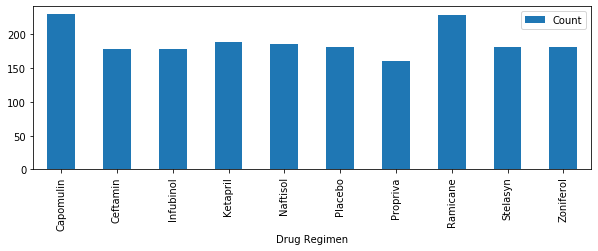

<Figure size 432x288 with 0 Axes>

In [26]:
# Use DataFrame.plot() in order to create a bar chart of the data
regimen_datapoints.plot(kind="bar", figsize=(10,3))
plt.show()
plt.tight_layout()

In [27]:
import matplotlib.pyplot as plt

# Generate a bar plot showing number of data points for each treatment regimen using pyplot

drug_regimens = combined_mousestudy_df.index.tolist()
drug_regimens









['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [28]:
# Convert regimen count into a list
regimen_count = (combined_mousestudy_data.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
regimen_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

In [29]:
x_axis = np.arange(len(regimen_count))
tick_locations=[value for value in x_axis]


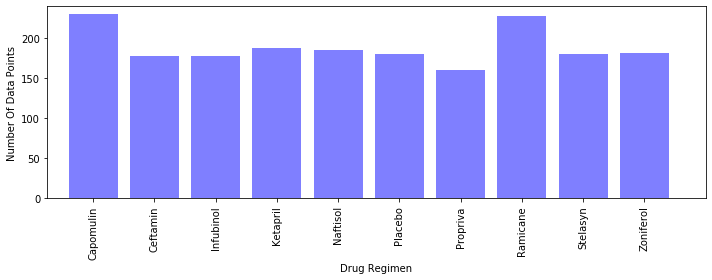

In [30]:
# Define x-axis
x_axis = drug_regimens
# Create a bar chart based upon the above data
plt.figure(figsize=(10,4))
plt.bar(x_axis, regimen_count, color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, drug_regimens,rotation="vertical")

# Set the limits of the x axis
plt.xlim(-0.75, 10)
# Set the limits of the y axis
plt.ylim(0,max(regimen_count)+10)

# Give the chart a title, x label, and y label

plt.xlabel("Drug Regimen")
plt.ylabel("Number Of Data Points")


plt.tight_layout()
plt.show()

## Pie plots

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(combined_mousestudy_data.groupby(["Sex"]).count()).reset_index()
gender_df.head()

,Sex,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [32]:

# Filter the DataFrame down only to those columns to chart
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

,Sex,Count
0,Female,935
1,Male,958


Text(0.5, 1.0, 'Sex')

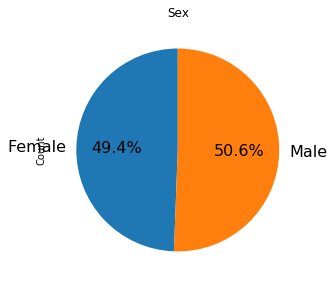

In [33]:


plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=gender_df['Sex'], legend = False, fontsize=16)


plt.title("Sex")


# USING PYPLOT

In [34]:





# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = (combined_mousestudy_data.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count











[935, 958]

In [35]:
labels = ["Female", "Male"]

# The colors of each section of the pie chart
colors = ["orange", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0)

([<matplotlib.patches.Wedge at 0x187ef875248>,
 [Text(-0.7887477729166414, -0.904365496201087, 'Female'),
  Text(0.7230187918402547, 0.8290017048509963, 'Male')],
 [Text(-0.46010286753470747, -0.527546539450634, '49.4%'),
  Text(0.3943738864583208, 0.4521827481005434, '50.6%')])

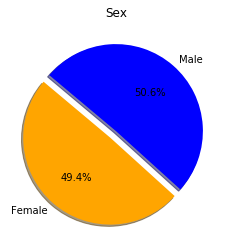

In [36]:
# Automatically finds the percentages of each part of the pie chart
plt.title("Sex")
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, outliers and boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
combined_mousestudy_data.head()







,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [38]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [55]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin_df = combined_mousestudy_data.loc[combined_mousestudy_data["Drug Regimen"] == "Capomulin"]

capomulin_df = capomulin_df.reset_index()
capomulin_df.head()




,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.0,0,Capomulin,Female,9,22
1,226,j246,0,45.0,0,Capomulin,Female,21,21
2,227,r554,0,45.0,0,Capomulin,Female,8,17
3,228,s185,0,45.0,0,Capomulin,Female,3,17
4,229,b742,0,45.0,0,Capomulin,Male,7,21


In [56]:




# Select data of a single mouse
cap_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "r554"]
cap_single_df










,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
2,227,r554,0,45.000000,0,Capomulin,Female,8,17
42,433,r554,5,45.781746,1,Capomulin,Female,8,17
50,498,r554,10,39.005494,2,Capomulin,Female,8,17
86,808,r554,15,35.463758,2,Capomulin,Female,8,17
103,940,r554,20,36.015589,2,Capomulin,Female,8,17
136,1243,r554,25,33.893345,3,Capomulin,Female,8,17
149,1340,r554,30,32.680655,3,Capomulin,Female,8,17
175,1534,r554,35,33.069337,3,Capomulin,Female,8,17
204,1734,r554,40,31.804841,3,Capomulin,Female,8,17
213,1788,r554,45,32.377357,3,Capomulin,Female,8,17


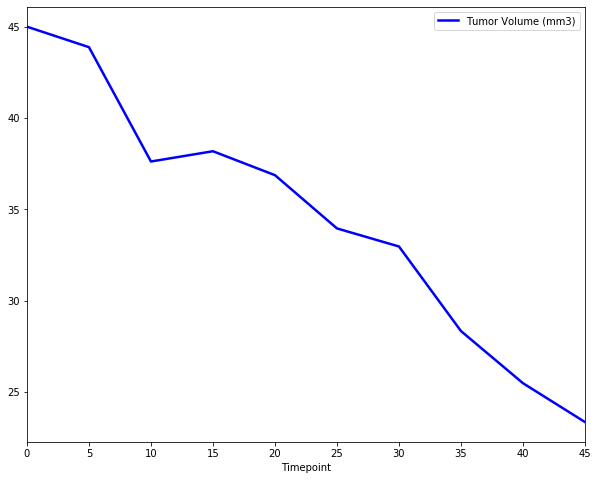

In [41]:

cap_single_df = cap_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
#capomulin_df.index
#Reset the index
cap_single_df = cap_single_df.reset_index(drop=True)
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_single_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='blue')

In [42]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
capomulin_df.head()







,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.0,0,Capomulin,Female,9,22
1,226,j246,0,45.0,0,Capomulin,Female,21,21
2,227,r554,0,45.0,0,Capomulin,Female,8,17
3,228,s185,0,45.0,0,Capomulin,Female,3,17
4,229,b742,0,45.0,0,Capomulin,Male,7,21


In [43]:

# Selecting only 3 columns
reduced_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
reduced_df.head()


,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,45.0
1,j246,21,45.0
2,r554,17,45.0
3,s185,17,45.0
4,b742,21,45.0


In [44]:

# Calculate average tumor volume for each mouse in the Capomulin regimen
average_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
average_cap.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [45]:
# Rename Tumor Volume column
average_cap = average_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})
average_cap.head()


,Mouse ID,Weight (g),Average Volume
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [46]:
# Set the 'Mouse ID' as our index
average_cap = average_cap.set_index('Mouse ID')

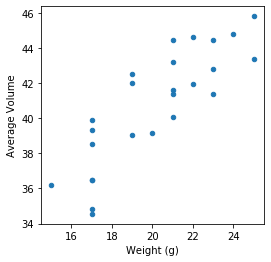

In [50]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
average_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume",  figsize=(4,4),
              )
plt.show()

correlations 

In [51]:
import matplotlib.pyplot as plt
mouse_weight = average_cap.iloc[:,0]
avg_tumor_volume = average_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


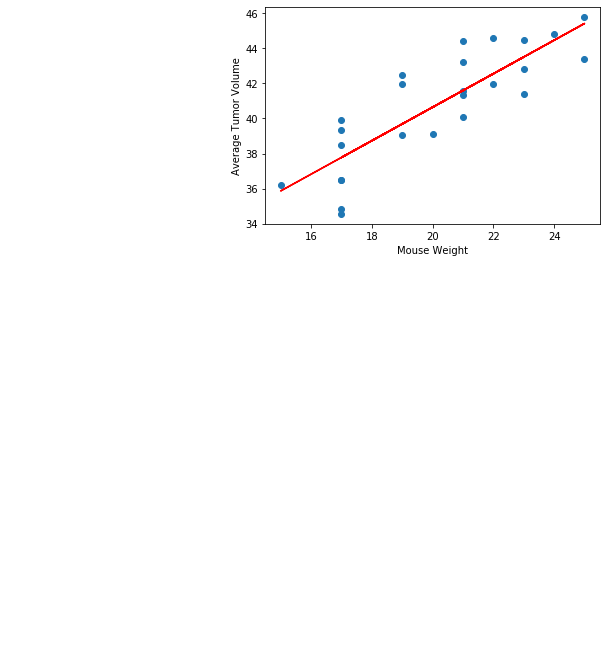

In [52]:
x_values = average_cap['Weight (g)']
y_values = average_cap['Average Volume']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()